<h1 style="color:blue; font-size:36px;">Projet Machine Learning 4A</h1>

In [18]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns


In [19]:
data=pd.read_csv('global-data-on-sustainable-energy.csv')
data.shape
#data['Value_co2_emissions_kt_by_country'].groupby(['Entity'])
#data['Value_co2_emissions_kt_by_country'].groupby(data['Entity']).sum().sort_values(ascending=False)
data.isna().sum().sum()



6978

### <span style="color:blue">**I. Nettoyage des données** </span>

#### <span style="color:blue">**I.1 Suppression des NAN** </span>

#### Grace à la statistique "count", nous constatons que les variables n'ont pas toutes le meme nombre d'observations indinquant ainsi la présence de données manquantes

In [20]:
(data.isna().sum()/data.shape[0]*100).sort_values(ascending=False)

Renewables (% equivalent primary energy)                            58.563990
Financial flows to developing countries (US $)                      57.248561
Renewable-electricity-generating-capacity-per-capita                25.513839
Value_co2_emissions_kt_by_country                                   11.729241
gdp_growth                                                           8.687312
gdp_per_capita                                                       7.728145
Energy intensity level of primary energy (MJ/$2017 PPP GDP)          5.672787
Renewable energy share in the total final energy consumption (%)     5.316525
Access to clean fuels for cooking                                    4.631406
Electricity from nuclear (TWh)                                       3.453001
Low-carbon electricity (% electricity)                               1.151000
Electricity from renewables (TWh)                                    0.575500
Electricity from fossil fuels (TWh)                             

#### Nous allons retirer les variables Renewables, Financial flows to developing countries et Renewable-electricity-generating-capacity-per-capita en raison de leur taux de données manquantes, situé entre 25 et 60 %. Ensuite, nous éliminerons tous les individus ayant des valeurs non disponibles (NaN) pour les variables restantes. il nous reste ainsi 2868 individus avec 18 variables

In [21]:
data.drop(['Renewable-electricity-generating-capacity-per-capita','Financial flows to developing countries (US $)','Renewables (% equivalent primary energy)'],axis=1,inplace=True)

In [22]:
data.dropna(axis=0,inplace=True)
data.shape

(2868, 18)

In [23]:
data.iloc[:,14]=data.iloc[:,14].str.replace(',','') #on remplace les virgule de la colonne Density par un espace
data.iloc[:, 14] = pd.to_numeric(data.iloc[:, 14], errors='coerce')

#### <span style="color:blue">**I.2 Conversion des variables 'Year' et 'Entity'** </span>

In [24]:
data['Year'] = data['Year'].astype('category')
data.rename(columns={data.columns[14]: 'Density'}, inplace=True)#renommer la colonne Density pour faciliter l'accés à la variable
data['Density']= pd.to_numeric(data['Density'], errors='coerce')


In [25]:
# Regrouper les émissions de CO2 par pays
co2_by_country = data.groupby('Entity')['Value_co2_emissions_kt_by_country'].sum().reset_index()

# Trier les pays par ordre décroissant en fonction des émissions de CO2
co2_by_country_sorted = co2_by_country.sort_values(by='Value_co2_emissions_kt_by_country', ascending=False)

# Afficher les résultats
print(co2_by_country_sorted)

                    Entity  Value_co2_emissions_kt_by_country
27                   China                       1.527328e+08
142          United States                       1.065908e+08
62                   India                       3.267958e+07
68                   Japan                       2.367469e+07
50                 Germany                       1.547289e+07
..                     ...                                ...
35                Djibouti                       2.520000e+03
145                Vanuatu                       2.460000e+03
114  Sao Tome and Principe                       1.860000e+03
71                Kiribati                       1.190000e+03
92                   Nauru                       5.300000e+02

[148 rows x 2 columns]


#### Les 5 pays les plus émetteurs de CO2 sont: La chine, les etats unis,l'inde, le japon et L'Allmagne

In [26]:
Value_co2_emissions_kt_by_country=np.log(data['Value_co2_emissions_kt_by_country'])
data.drop(['Value_co2_emissions_kt_by_country'],axis=1,inplace=True)


In [27]:
Value_co2_emissions_kt_by_country.reset_index(drop=True,inplace=True)
Value_co2_emissions_kt_by_country.index

RangeIndex(start=0, stop=2868, step=1)

In [28]:
data.drop(['Electricity from fossil fuels (TWh)'],axis=1,inplace=True)

### <span style="color:blue">**II. Analyse unidimentionnelle** </span>

#### <span style="color:blue">*II.1 Variables qualitatives* </span>

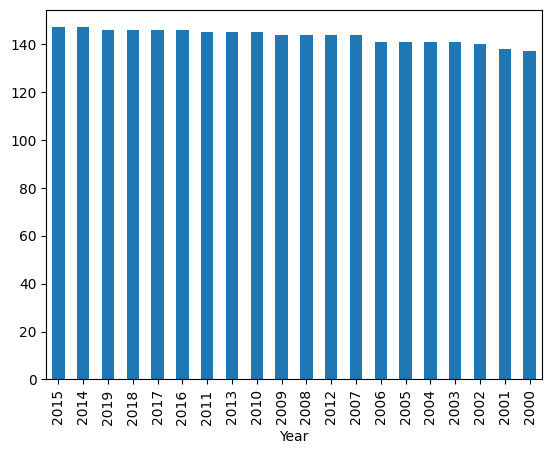

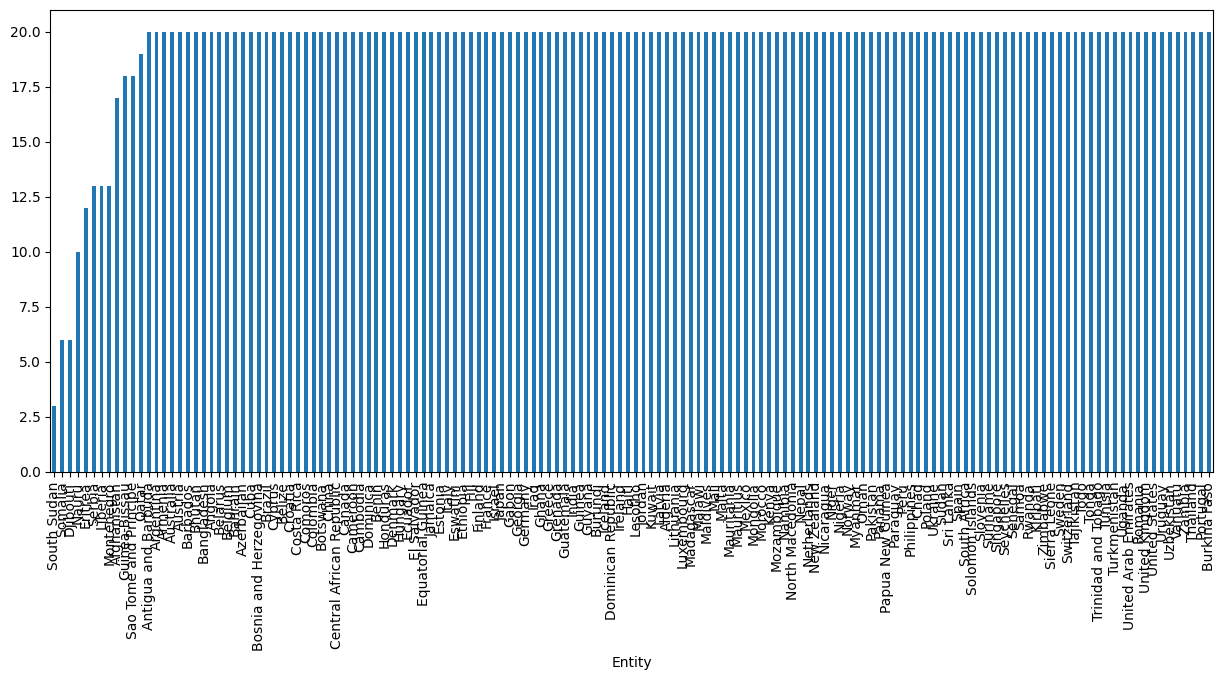

In [29]:
data['Year'].value_counts().plot.bar()
plt.figure(figsize=(15,6))

data['Entity'].value_counts().sort_values(ascending=True).plot.bar()
plt.tick_params(axis='x', rotation=90)

#### Nous observons des disparités dans le nombre d'observations pour chaque année. Les années les plus anciennes présentent moins d'observations que les plus récentes, ce qui peut indiquer une amélioration dans la collecte des données au fil du temps. De plus, il est important de noter que nous n'avons pas le même nombre d'observations pour chaque pays. Certains pays, comme le South Sudan, ont significativement moins d'observations par rapport aux autres, ce qui pourrait refléter des lacunes dans la disponibilité des données ou des déficultés dans la collecte d'informations dans ces régions

#### <span style="color:blue">*II.2 Variables quantitatives* </span>

In [30]:
data1=data.iloc[:,2:] #On extrait que les variables quantitatives
data1.shape

(2868, 14)

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13],
 [Text(0, 0, 'Access to electricity (% of population)'),
  Text(1, 0, 'Access to clean fuels for cooking'),
  Text(2, 0, 'Renewable energy share in the total final energy consumption (%)'),
  Text(3, 0, 'Electricity from nuclear (TWh)'),
  Text(4, 0, 'Electricity from renewables (TWh)'),
  Text(5, 0, 'Low-carbon electricity (% electricity)'),
  Text(6, 0, 'Primary energy consumption per capita (kWh/person)'),
  Text(7, 0, 'Energy intensity level of primary energy (MJ/$2017 PPP GDP)'),
  Text(8, 0, 'gdp_growth'),
  Text(9, 0, 'gdp_per_capita'),
  Text(10, 0, 'Density'),
  Text(11, 0, 'Land Area(Km2)'),
  Text(12, 0, 'Latitude'),
  Text(13, 0, 'Longitude')])

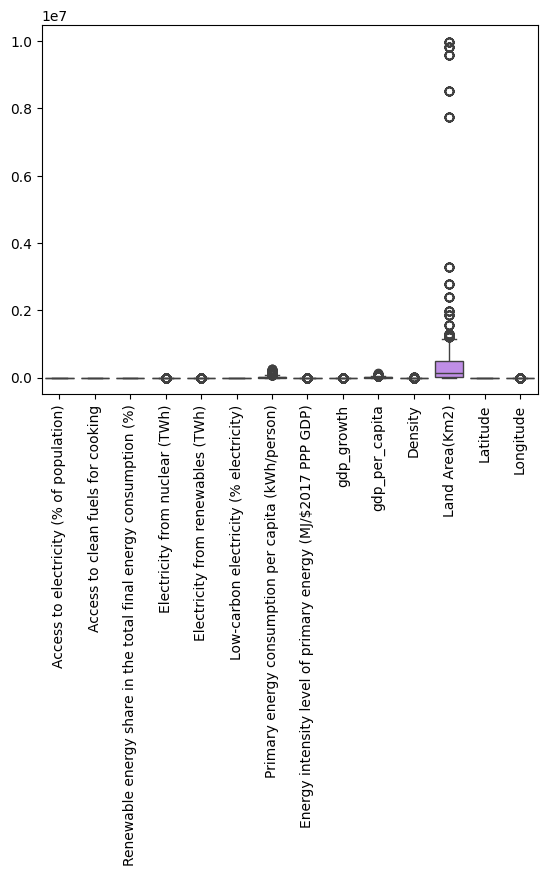

In [31]:
sns.boxplot(data1)
plt.xticks(rotation=90)

#### Nous notons que nos variables présentent non seulement  unités de mesure variées, mais aussi des échelles différentes. Certaines variables ont une importance relative plus élevée que d'autres. Afin d'homogénéiser nos données on va les centrer et les reduire

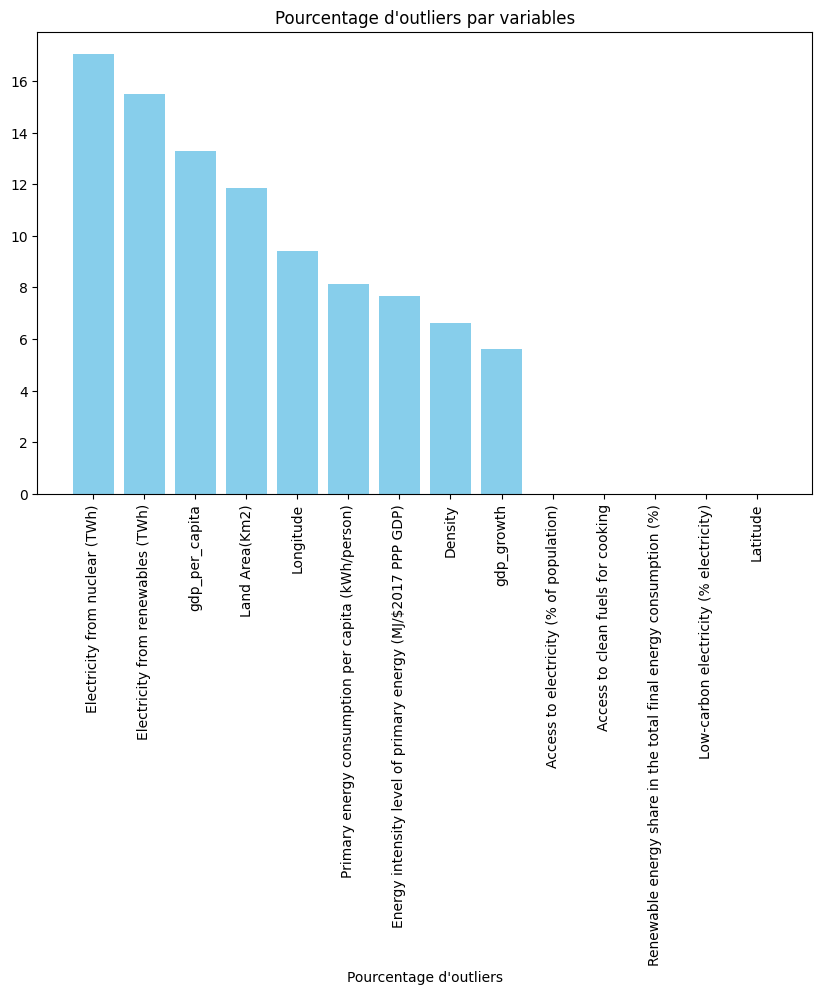

In [17]:

def percent_outliers(data):
    percent_outliers_list = []
    for i in range(data.shape[1]): 
            q1 = np.percentile(data.iloc[:, i], 25)
            q3 = np.percentile(data.iloc[:, i], 75)
            iqr = q3 - q1
            bornes_inf = q1 - 1.5 * iqr
            bornes_sup = q3 + 1.5 * iqr
            outliers = data.iloc[:, i][(data.iloc[:, i] < bornes_inf) | (data.iloc[:, i] > bornes_sup)]
            percent_outliers = 100 * len(outliers) / len(data.iloc[:, i])
            percent_outliers_list.append((data.columns[i], percent_outliers))
    return percent_outliers_list

pourcentages_outliers = percent_outliers(data1)

# Tri de la liste par ordre croissant en fonction du pourcentage d'outliers
pourcentages_outliers_tries = sorted(pourcentages_outliers, key=lambda x: x[1],reverse=True)


# Séparation des colonnes et des pourcentages
colonnes = [colonne for colonne, _ in pourcentages_outliers_tries]
pourcentages = [pourcentage for _, pourcentage in pourcentages_outliers_tries]

# Tracé du graphique à barres
plt.figure(figsize=(10, 6))
plt.bar(colonnes, pourcentages, color='skyblue')
plt.xlabel("Pourcentage d'outliers")
plt.title("Pourcentage d'outliers par variables")
plt.xticks(rotation=90)
plt.show()
        
    






On remarque après analyse des boxplot qu’il y'a beacoup d'outliers au niveau des variables 'Electricity from fossil fuels', 'Electricity from nuclear' et 'Electricity from renewables'. Il contiennent plus 15% de valeurs aberrantes. Il est plausible que dans certains pays, ces sources d'énergie soient très abondantes et largement utilisées, ce qui peut entraîner des fluctuations extrêmes dans les données.

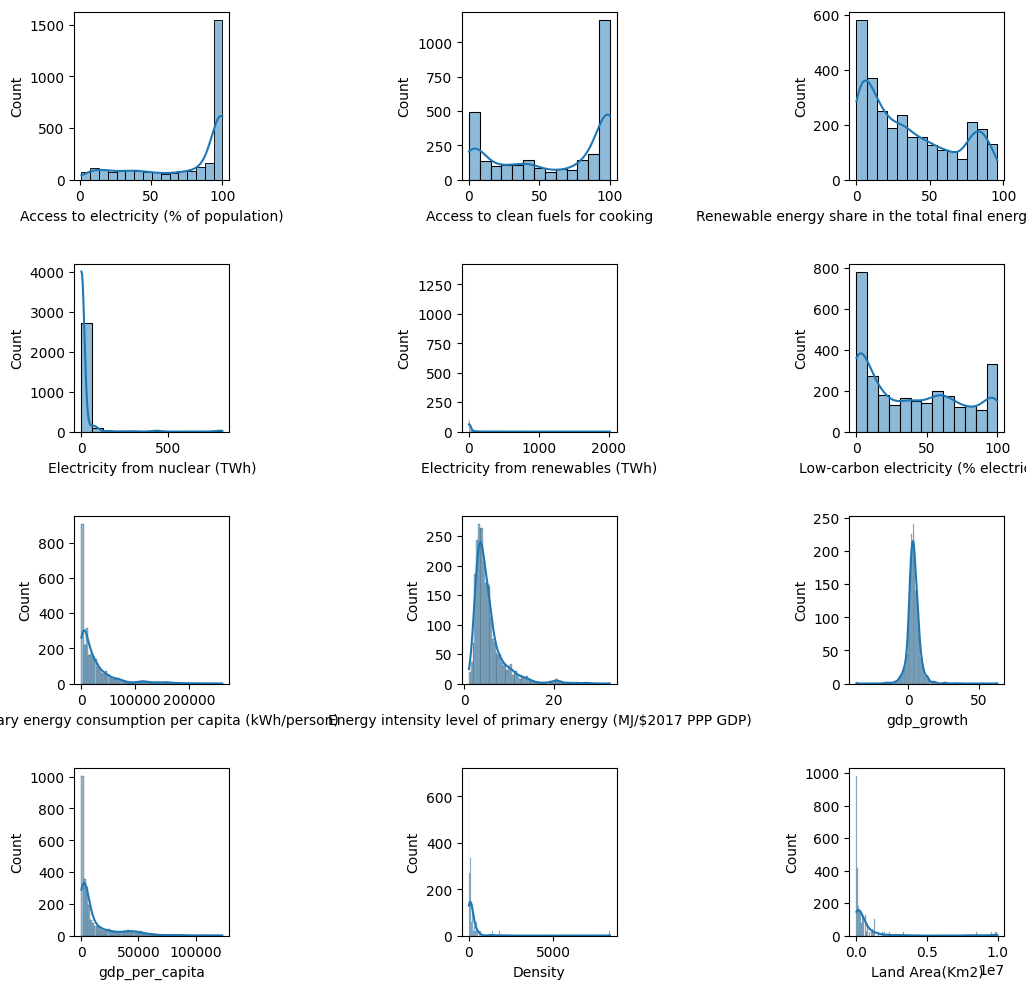

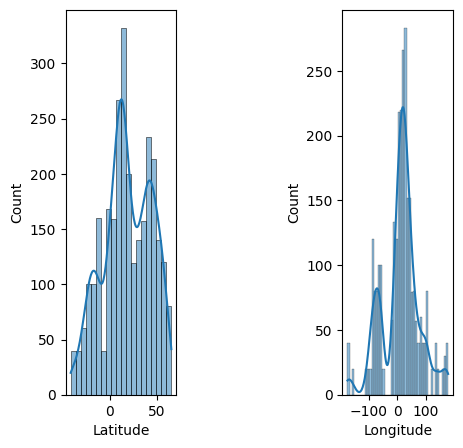

In [18]:
fig,ax=plt.subplots(4,3,figsize=(12, 12))
plt.subplots_adjust(wspace=1.5,hspace=0.5)
k=0
for i in range(4):
    for j in range(3):
        sns.histplot(data1.iloc[:, k], kde=True, ax=ax[i, j])
        k+=1

plt.show()
fig,ax=plt.subplots(1,2,figsize=(5, 5))
plt.subplots_adjust(wspace=1.5,hspace=0.5)
for j in range(2):
    sns.histplot(data1.iloc[:, k], kde=True, ax=ax[j])
    k+=1

In [32]:
# Prendre la racine carrée des colonnes spécifiques
columns_sqrt = ["Access to electricity (% of population)",
                "Access to clean fuels for cooking",
                "Renewable energy share in the total final energy consumption (%)",
                "Electricity from nuclear (TWh)",
                "Electricity from renewables (TWh)",
                "Low-carbon electricity (% electricity)"]
data[columns_sqrt] = np.sqrt(data[columns_sqrt])

# Prendre le logarithme des colonnes spécifiques
columns_log = ["Primary energy consumption per capita (kWh/person)",
               "gdp_per_capita",
               "Density",
               "Land Area(Km2)"]
data[columns_log] = np.log(data[columns_log])

data1=data.iloc[:,2:]


### <span style="color:blue">**II. Analyse multiimentionnelle** </span>

<Axes: >

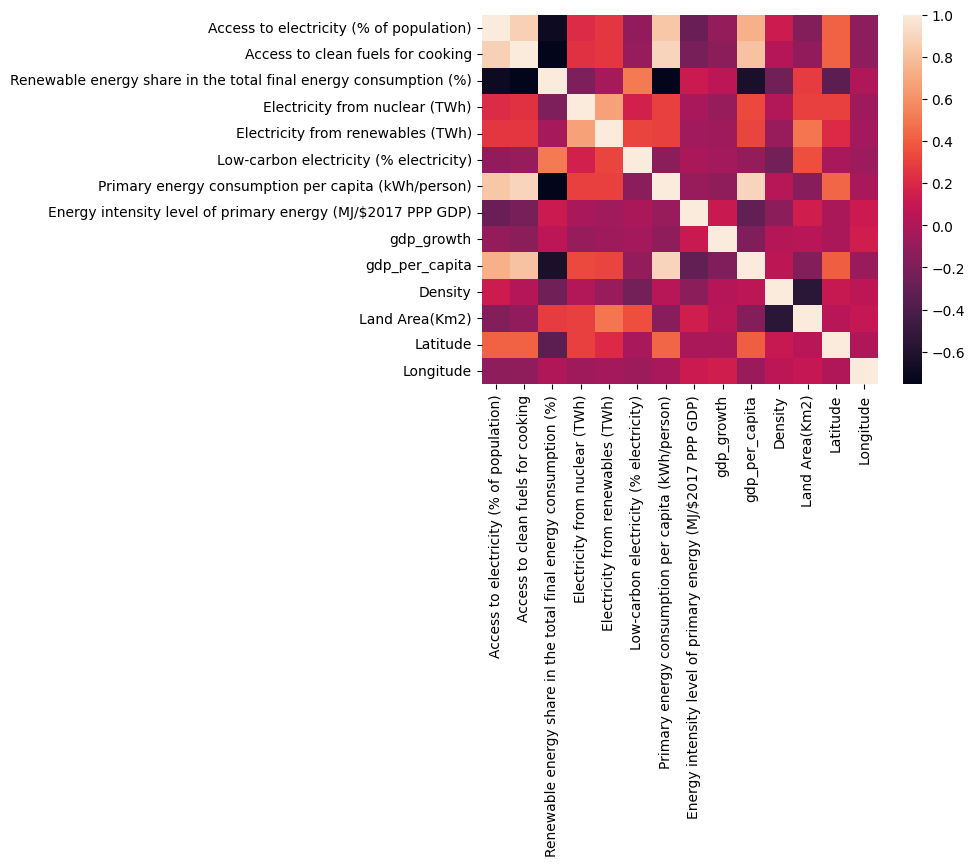

In [33]:
sns.heatmap(data1.corr())

In [21]:

# from scipy.stats import linregress
# res=[]
# for i in range(len(correlation_matrix)):
#     for j in range(i+1, len(correlation_matrix)):
#         correlation_coef = correlation_matrix[i, j]
#         if correlation_coef > 0.8:
#             res.append([data1.columns[i],data1.columns[j]])
# print(res)

# k=0
# fig,ax=plt.subplots(1,2,figsize=(12,6))
# plt.subplots_adjust(wspace=1.5,hspace=0.5)
# j=1
# for i in range(2):
#         # Tracer le nuage de points
#         ax[i].scatter(data1.loc[:, res[k][0]], data1.loc[:, res[k][1]])
    
#         # Calcul de la droite de régression linéaire
#         slope, intercept, _, _, _ = linregress(data1.loc[:, res[k][0]], data1.loc[:, res[k][1]])
#         regression_line = slope * data1.loc[:, res[k][0]] + intercept
    
#         # Tracer la droite de régression linéaire
#         ax[i].plot(slope * data1.loc[:, res[k][0]], regression_line, color='red')
#         # Étiquettes et légendes
#         ax[i].set_xlabel(res[k][0])
#         ax[i].set_ylabel(res[k][1])
#         k+=1
        
#         # Afficher le graphique
# plt.show()

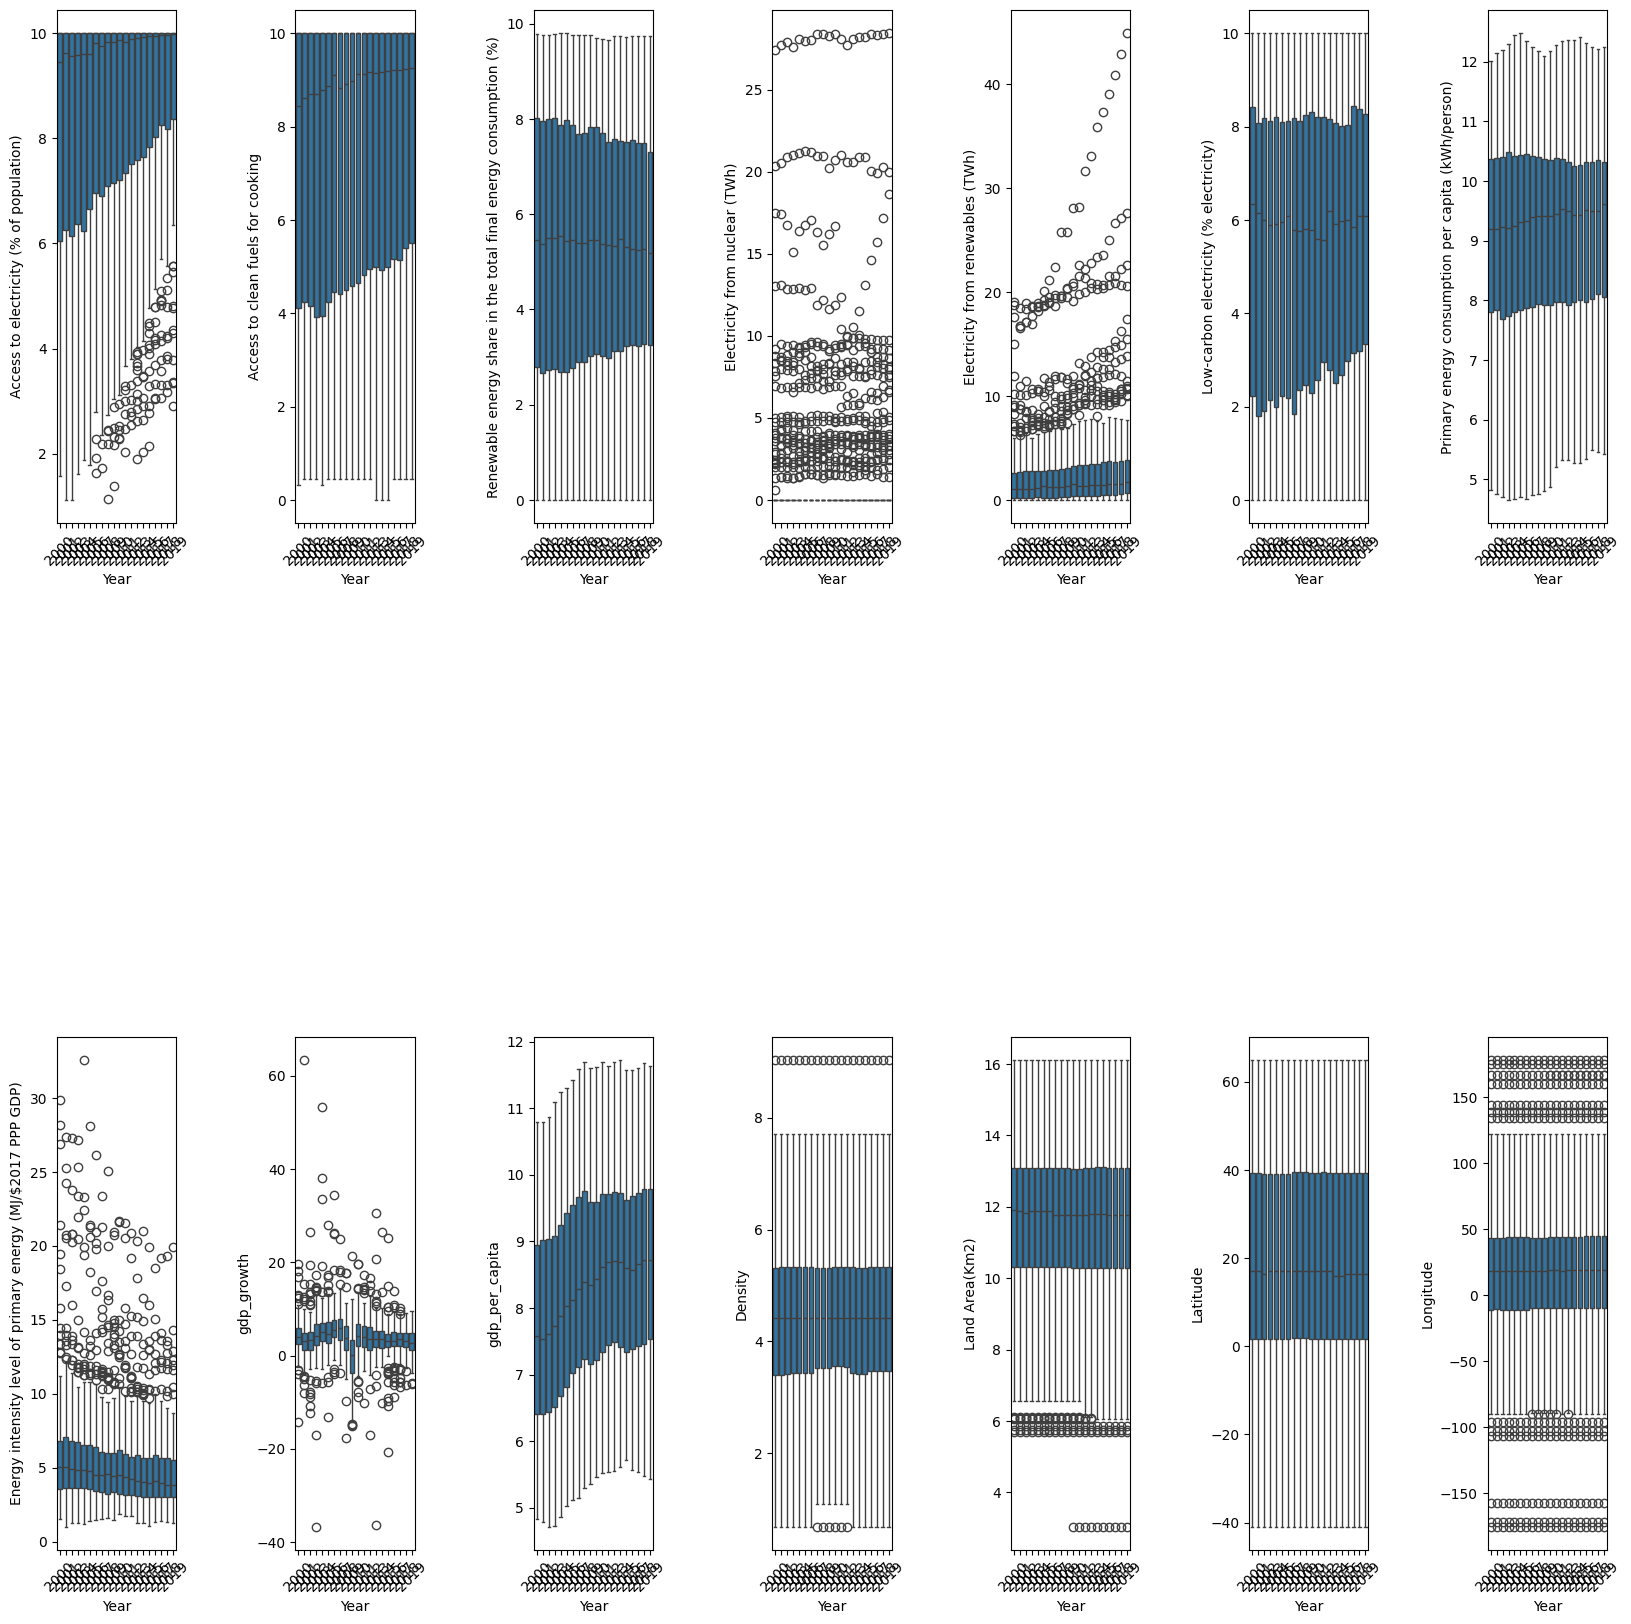

In [34]:
fig,ax=plt.subplots(2,7,figsize=(20,20))
plt.subplots_adjust(hspace=1, wspace=1)
k=0
for i in range(2):
    for j in range(7):
        sns.boxplot(x=data.iloc[:,1],y=data1.iloc[:,k],data=data,ax=ax[i, j])
        ax[i, j].set_xticks(ax[i, j].get_xticks())
        ax[i, j].set_xticklabels(ax[i, j].get_xticklabels(), rotation=45)
        k+=1
plt.show()

In [35]:
from sklearn.decomposition import PCA
data1 = (data1 - data1.mean()) / data1.std()
pca=PCA()
data1_pca=pca.fit(data1).transform(data1)


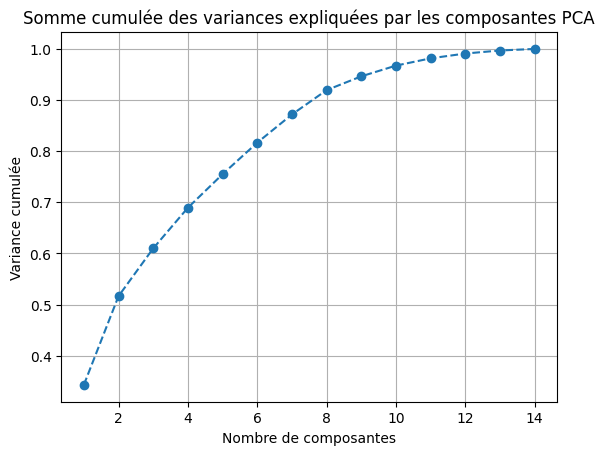

In [36]:
cumulative_variance = np.cumsum(pca.explained_variance_ratio_)

# Tracer la somme cumulée des variances
plt.plot(range(1,15),cumulative_variance,marker='o',linestyle="--")
plt.xlabel('Nombre de composantes')
plt.ylabel('Variance cumulée')
plt.title('Somme cumulée des variances expliquées par les composantes PCA')
plt.grid(True)
plt.show()

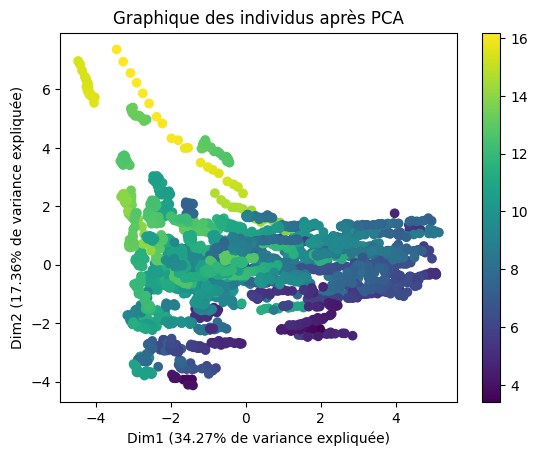

In [37]:
plt.scatter(data1_pca[:,0],data1_pca[:,1], c=Value_co2_emissions_kt_by_country)
plt.xlabel(f'Dim1 ({pca.explained_variance_ratio_[0]*100:.2f}% de variance expliquée)')
plt.ylabel(f'Dim2 ({pca.explained_variance_ratio_[1]*100:.2f}% de variance expliquée)')
plt.title('Graphique des individus après PCA')
plt.colorbar()
plt.show()


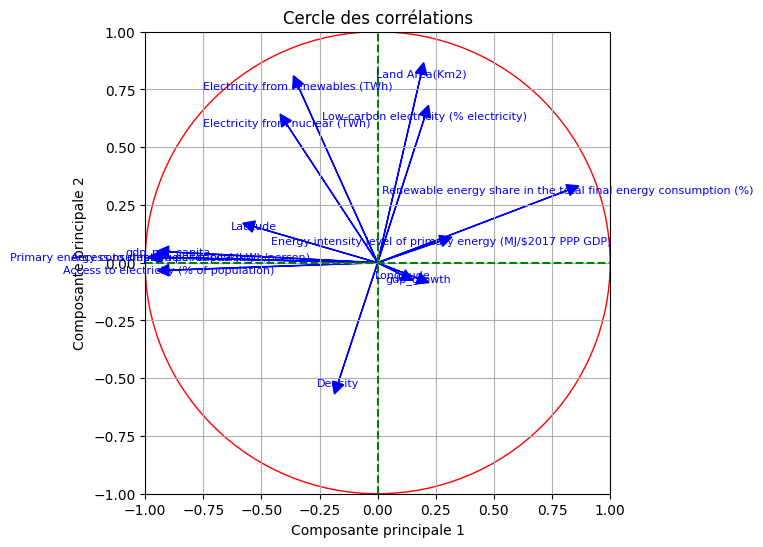

In [38]:
coord1 = pca.components_[0] * np.sqrt(pca.explained_variance_[0])
coord2 = pca.components_[1] * np.sqrt(pca.explained_variance_[1])

fig, ax = plt.subplots(figsize=(6, 6))

for i, j, nom in zip(coord1, coord2, data1.columns):
    ax.text(i, j, nom, fontsize=8, ha='center', va='center', color='blue')
    ax.arrow(0, 0, i, j, color='blue', head_width=0.05, head_length=0.05)

ax.set(xlim=(-1, 1), ylim=(-1, 1))
ax.axhline(0, linestyle='dashed', color='green')
ax.axvline(0, linestyle='dashed', color='green')

# Ajout du cercle
cercle = plt.Circle((0, 0), radius=1, color='red', fill=False)
ax.add_patch(cercle)

plt.xlabel('Composante principale 1')
plt.ylabel('Composante principale 2')
plt.title('Cercle des corrélations')

plt.grid(True)
plt.show()


### <span style="color:blue">**III. Modélisations** </span>

In [39]:
data.reset_index(drop=True,inplace=True)
data1.reset_index(drop=True,inplace=True)

In [47]:
dataDum=pd.get_dummies(data[['Year','Entity']])
#data1.reset_index(drop=True, inplace=True)
#dataDum.reset_index(drop=True, inplace=True)


dfC= pd.concat([dataDum, data1], axis=1) #data1 variable quantitatives
dfC.head()

,Year_2000,Year_2001,Year_2002,Year_2003,Year_2004,Year_2005,Year_2006,Year_2007,Year_2008,Year_2009,...,Electricity from renewables (TWh),Low-carbon electricity (% electricity),Primary energy consumption per capita (kWh/person),Energy intensity level of primary energy (MJ/$2017 PPP GDP),gdp_growth,gdp_per_capita,Density,Land Area(Km2),Latitude,Longitude
0,False,False,False,True,False,False,False,False,False,False,...,-0.450633,0.848368,-2.258782,-1.123188,1.062713,-1.963254,-0.181546,0.788417,0.63385,0.83599
1,False,False,False,False,True,False,False,False,False,False,...,-0.461047,0.773961,-2.330927,-1.179095,-0.534097,-1.898120,-0.181546,0.788417,0.63385,0.83599
2,False,False,False,False,False,True,False,False,False,False,...,-0.456508,0.783520,-2.203004,-1.120393,1.578777,-1.812539,-0.181546,0.788417,0.63385,0.83599
3,False,False,False,False,False,False,True,False,False,False,...,-0.449194,1.006939,-2.088298,-1.095235,0.314722,-1.758263,-0.181546,0.788417,0.63385,0.83599
4,False,False,False,False,False,False,False,True,False,False,...,-0.434048,1.052726,-1.996101,-1.086849,2.137714,-1.562128,-0.181546,0.788417,0.63385,0.83599


In [41]:
# Splitting the data into training and testing sets
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler 
from sklearn.metrics import r2_score

scaler = StandardScaler()  



XTrain, XTest, YTrain, YTest = train_test_split(dfC, Value_co2_emissions_kt_by_country, test_size=0.2, random_state=11)
scaler.fit(XTrain)
Xr_train = scaler.transform(XTrain)

Xr_test = scaler.transform(XTest)

#### <span style="color:blue">**III.A Regression linéaire** </span>

#### <span style="color:blue">**III.A.1 Modèle sans selection** </span>

In [48]:
from sklearn.linear_model import LinearRegression
regLin = LinearRegression()
regLin.fit(Xr_train, YTrain)



# Making predictions on the testing set
prev = regLin.predict(Xr_test)

# Calculating mean squared error
mse = mean_squared_error(YTest, prev)
R2=r2_score(YTest,prev)
print("MSE =", mse)
print("R2 =",R2)

MSE = 0.018330994217439247
R2 = 0.996556351741511


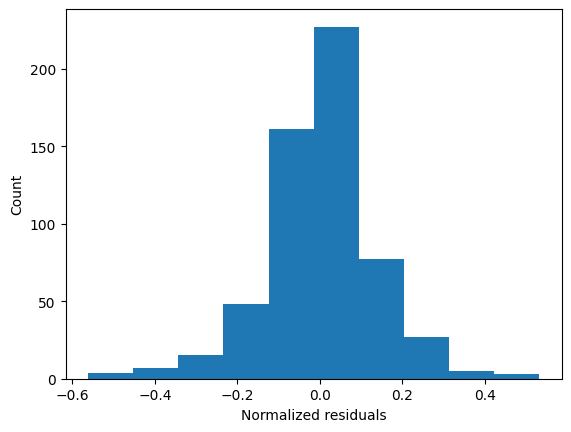

In [43]:
plt.hist(YTest-prev)
plt.ylabel('Count')

plt.xlabel('Normalized residuals')

plt.show()

Text(0, 0.5, 'Residual')

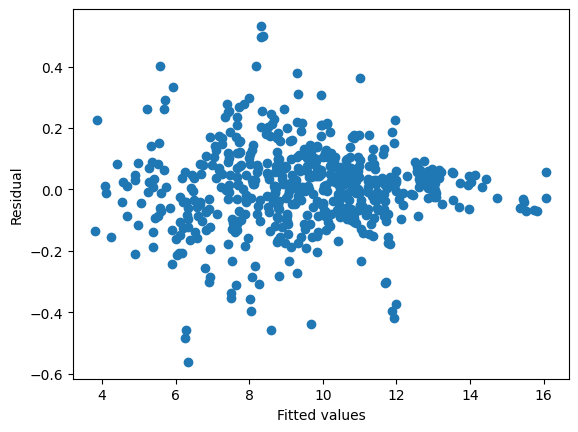

In [44]:
plt.scatter(prev,YTest-prev)
plt.xlabel('Fitted values')
plt.ylabel('Residual')

#### <span style="color:blue">**III.A.2 Regression linéaire Lasso** </span>

In [45]:
from sklearn.linear_model import Lasso
# Fitting the Lasso regression model
regLasso = Lasso()
regLasso.fit(Xr_train, YTrain)

# Making predictions on the testing set
prev = regLasso.predict(Xr_test)

# Calculating mean squared error
mse = mean_squared_error(YTest, prev)
R2=r2_score(YTest,prev)
print("MSE =", mse)
print("R2 = ",R2)

MSE = 3.548730238784596
R2 =  0.3333379214635521


In [46]:
coef = pd.Series(regLasso.coef_, index = XTrain.columns)
print("Lasso conserve " + str(sum(coef != 0)) + 
      " variables et en supprime " +  str(sum(coef == 0)))

Lasso conserve 3 variables et en supprime 179


Text(0, 0.5, 'Residuals')

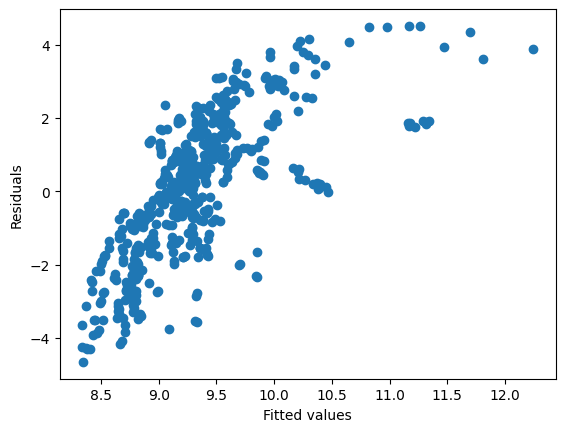

In [35]:
plt.scatter(prev,YTest-prev)
plt.xlabel('Fitted values')
plt.ylabel('Residuals')

In [49]:
from sklearn.model_selection import GridSearchCV
# grille de valeurs du paramètre alpha à optimiser

param=[{"alpha":[0,0.05,0.1,0.2,0.3,50,500,1000,1500]}]
regLasso = GridSearchCV(Lasso(), param,cv=5,n_jobs=-1)
regLassOpt=regLasso.fit(Xr_train, YTrain)
# paramètre optimal
regLassOpt.best_params_["alpha"]
print("Meilleur R2 = %f, Meilleur paramètre = %s" % (regLassOpt.best_score_,regLassOpt.best_params_))

C:\Users\maymo\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:1152: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  return fit_method(estimator, *args, **kwargs)
C:\Users\maymo\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(


Meilleur R2 = 0.996140, Meilleur paramètre = {'alpha': 0}


C:\Users\maymo\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.125e+01, tolerance: 1.325e+00 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(


In [50]:
prev=regLassOpt.predict(Xr_test)
print("MSE=",mean_squared_error(prev,YTest))
print("R2=",r2_score(YTest,prev))
#Le modèle est sur paramétré avec 20

MSE= 0.018151419070089877
R2= 0.9965900866080493


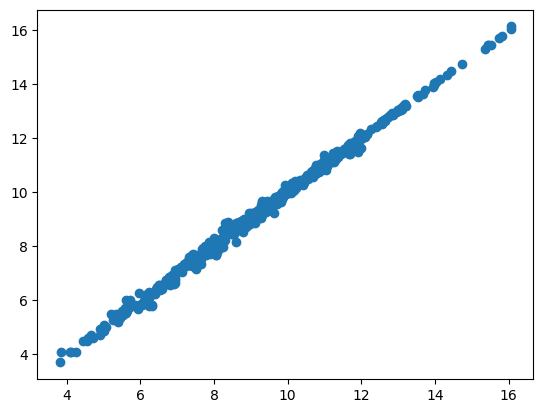

In [38]:
plt.plot(prev,YTest,"o")


#sns.residplot(
#plt.xlabel(u"O3 Prédite")
#plt.ylabel("O3 observee")
plt.show()



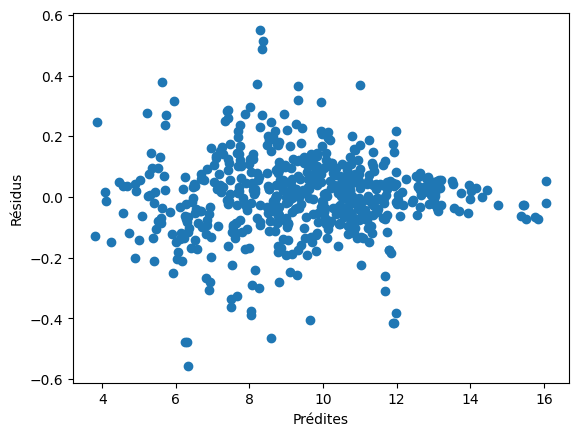

In [39]:
plt.plot(prev,YTest-prev,"o")
plt.xlabel(u"Prédites")
plt.ylabel(u"Résidus")
# plt.hlines(0,40,2
plt.show()

In [40]:
coef = pd.Series(regLassOpt.best_estimator_.coef_, index = XTrain.columns)
print("LassoOPT conserve " + str(sum(coef != 0)) + 
      " variables et en supprime " +  str(sum(coef == 0)))

LassoOPT conserve 182 variables et en supprime 0


#### <span style="color:blue"> **III.A.3 Modèle sélection avec le critère BIC**  </span>

In [41]:
# A=Value_co2_emissions_kt_by_country.mean()

In [42]:
# # Dénombrement des erreurs par
# # matrice de confusion
# table=pd.crosstab(prev>A,YTest>A)
# print(table)

In [43]:
# import statsmodels.api as sm PLUS DE 15MN SANS S'EXECUTER!!!!!!!!!!!!!
# import itertools

# # Créez une fonction pour ajuster un modèle avec une certaine combinaison de variables
# def fit_model(features):
#     selected_columns = [XTrain.columns.get_loc(col) for col in features]  # Obtenez les indices des colonnes dans XTrain
#     X_subset = sm.add_constant(Xr_train[:, selected_columns])  # Sélectionnez toutes les colonnes de XTrain
#     #X_subset = sm.add_constant(Xr_train[list(features)]) 
#     model = sm.OLS(YTrain, X_subset)
#     result = model.fit()
#     return result

# best_bic = float('inf')  # Initialisation du BIC le plus bas
# best_model = None  # Initialisation du meilleur modèle
# best_features = None  # Initialisation des meilleures variables

# # Liste de toutes les colonnes de XTrain
# all_features = XTrain.columns.tolist()

# # Boucle à travers toutes les combinaisons de variables possibles
# for k in range(1, len(all_features) + 1):  # Essayer des modèles avec 1, 2, ..., N variables
#     for combo in itertools.combinations(all_features, k):
#         result = fit_model(combo)
#         bic = result.bic
#         if bic < best_bic:
#             best_bic = bic
#             best_model = result
#             best_features = combo

# # Affichage des résultats
# print("Meilleur BIC :", best_bic)
# print("Variables sélectionnées :", best_features)
# print(best_model.summary())



### <span style="color:blue"> **III.B SVM**  </span>

In [ ]:
from sklearn.svm import SVR


param= {'C': [1, 1.5, 2, 2.5, 3, 3.5, 4, 4.5, 5],}
svm= GridSearchCV(SVR(epsilon=0.01),param,cv=10,n_jobs=-1)
svmOpt=svm.fit(Xr_train, YTrain)
# paramètre optimal
print("Meilleur score = %f, Meilleur paramètre = %s" % (1. - svmOpt.best_score_,svmOpt.best_params_))

In [ ]:
y_chap = svmOpt.predict(XTest)
print("MSE=",mean_squared_error(y_chap,YTest))

plt.scatter(y_chap,YTest-y_chap)